# Class Activation Map (CAM)

In [2]:
from tensorflow.keras.applications.vgg16 import preprocess_input

#from tensorflow.keras.applications.resnet import preprocess_input

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np

import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

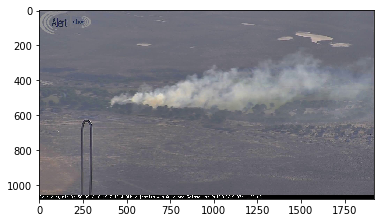

In [3]:
img_path = r'C:\Users\Sanika\Desktop\LAB Work\Alert-Wildfire\data\images\mixed set\85.jpg'
img= mpimg.imread(img_path)
plt.imshow(img)

In [300]:
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))

In [301]:
x = image.img_to_array(img) 

In [302]:
import numpy as np
x = np.expand_dims(x, axis=0)

In [303]:
x.shape

(1, 224, 224, 3)

In [304]:
model = tf.keras.applications.vgg16.VGG16() 

#model = tf.keras.applications.resnet.ResNet50(weights='imagenet') 
#print(model.summary())

img_tensor = preprocess_input(x) 
#print(img_tensor)

In [305]:
conv_layer = model.get_layer("block5_conv3")
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

#resnet
#conv_layer = model.get_layer("conv5_block3_out") 
#heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

In [306]:
with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

In [307]:
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)

heatmap1 = tf.squeeze(heatmap, [0]) 

print(heatmap1.shape)

(1, 14, 14)
(14, 14)


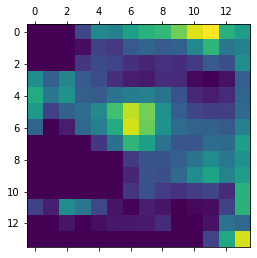

<class 'numpy.ndarray'>
(14, 14)


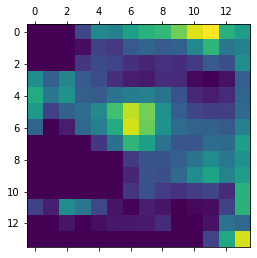

In [308]:
#heatmap = np.mean(conv_layer_output_value, axis=-1)
#heatmap = np.maximum(heatmap, 0)
#heatmap /= np.max(heatmap)

#heatmap = heat
plt.matshow(heatmap1)
plt.show() 

heatmap_data = np.asarray(heatmap1)

print(type(heatmap_data)) 
print(heatmap_data.shape)

plt.matshow(heatmap_data)
plt.show() 

In [4]:
import cv2
img = cv2.imread(img_path) 
print(img.shape)

(1080, 1920, 3)


In [310]:
heatmap_data_resized = cv2.resize(heatmap_data, (img.shape[1], img.shape[0]))

In [311]:
print(heatmap_data_resized.shape)

(1080, 1920)


In [312]:
heatmap = np.uint8(255 * heatmap_data_resized) 

In [313]:
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#output = 'G:/output.jpeg'
#cv2.imwrite(output, superimposed_img)
#img=mpimg.imread(output)
#plt.imshow(img)
#plt.axis('off')
#plt.title(predictions.loc[0,'category'].upper())

In [314]:
hif = .8
superimposed_img = heatmap * hif + img

(-0.5, 1919.5, 1079.5, -0.5)

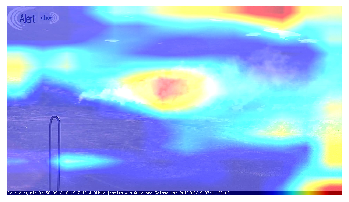

In [315]:
output =  r'C:\Users\Sanika\Desktop\LAB Work\Alert-Wildfire\85_cam.jpg'

cv2.imwrite(output, superimposed_img)
img=mpimg.imread(output)
plt.imshow(img)
plt.axis('off')